In [6]:
# =============================================================================
# CLUSTER TRADING ANALYSIS BETTER EACH CLUSTER APPART 
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)# Load all cluster data dont ask me why 
cluster_0 = pd.read_csv('cluster_0_trades.csv')
cluster_1 = pd.read_csv('cluster_1_trades.csv')
cluster_2 = pd.read_csv('cluster_2_trades.csv')
cluster_3 = pd.read_csv('cluster_3_trades.csv')


In [17]:

# Entry indicators
entry_indicators = [
    'entry_RSI(14)', 'entry_MA(20,SMA)', 'entry_MACD Main', 'entry_MACD Signal',
    'entry_ATR(14)', 'entry_ADX(14)', 'entry_plusDI(14)', 'entry_minusDI(14)',
    'entry_StochK(14)', 'entry_StochD(14)', 'entry_BB_Upper', 'entry_BB_Mid', 
    'entry_BB_Lower', 'entry_Spread (Pips)'
]

# Exit indicators
exit_indicators = [
    'exit_RSI(14)', 'exit_MA(20,SMA)', 'exit_MACD Main', 'exit_MACD Signal',
    'exit_ATR(14)', 'exit_ADX(14)', 'exit_plusDI(14)', 'exit_minusDI(14)',
    'exit_StochK(14)', 'exit_StochD(14)', 'exit_BB_Upper', 'exit_BB_Mid', 
    'exit_BB_Lower', 'exit_Spread (Pips)'
]

# Key indicators for focused analysis
key_indicators = [
    'entry_RSI(14)', 'entry_ATR(14)', 'entry_ADX(14)', 'entry_MACD Main',
    'entry_StochK(14)', 'entry_plusDI(14)', 'entry_minusDI(14)'
]

# Other relevant columns
other_cols = ['profit', 'duration_hours', 'trade_duration_minutes', 'entry_price', 'exit_price']




In [18]:
print("=" * 80)
print("STEP 1: AVERAGES AND STANDARD DEVIATIONS FOR EACH CLUSTER")
print("=" * 80)
def calculate_cluster_stats(df, indicators, cluster_name):
    """Calculate mean and std for all indicators in a cluster"""
    stats_dict = {}
    for ind in indicators:
        if ind in df.columns:
            stats_dict[ind] = {
                'Mean': df[ind].mean(),
                'Std': df[ind].std(),
                'Min': df[ind].min(),
                'Max': df[ind].max(),
                'Median': df[ind].median()
            }
    return pd.DataFrame(stats_dict).T



STEP 1: AVERAGES AND STANDARD DEVIATIONS FOR EACH CLUSTER


In [19]:
# Calculate stats for each cluster Entry Indicators
print("\n" + "="*60)
print("ENTRY INDICATORS STATISTICS BY CLUSTER")
print("="*60)
clusters = {'Cluster 0': cluster_0, 'Cluster 1': cluster_1, 
            'Cluster 2': cluster_2, 'Cluster 3': cluster_3}

entry_stats_all = {}
for name, df in clusters.items():
    entry_stats_all[name] = calculate_cluster_stats(df, entry_indicators, name)
    print(f"\n{name}:")
    print(entry_stats_all[name].round(4))





ENTRY INDICATORS STATISTICS BY CLUSTER

Cluster 0:
                         Mean      Std       Min       Max    Median
entry_RSI(14)         49.4544   8.6107   23.7566   68.2702   49.3825
entry_MA(20,SMA)    3423.5139 421.8736 2646.5685 4257.5890 3365.6865
entry_MACD Main       -0.1429   1.5354   -3.7064    4.4061   -0.1128
entry_MACD Signal     -0.0398   1.6515   -3.8973    4.8553    0.0436
entry_ATR(14)          3.2845   1.6656    0.6493   10.3893    2.9271
entry_ADX(14)         24.8717   6.5846   11.1920   44.4452   24.0125
entry_plusDI(14)      18.3189   6.5331    5.6719   36.0618   17.1778
entry_minusDI(14)     19.3466   6.8011    6.7216   36.8777   18.3803
entry_StochK(14)      48.0902  24.6161    4.9835   93.2070   44.3036
entry_StochD(14)      47.8914  23.4692    6.3048   93.2455   46.7669
entry_BB_Upper      3429.5965 422.9550 2647.6169 4268.7569 3370.1509
entry_BB_Mid        3423.5139 421.8736 2646.5685 4257.5890 3365.6865
entry_BB_Lower      3417.4313 420.8190 2645.5201 42

In [20]:
clusters = {'Cluster 0': cluster_0, 'Cluster 1': cluster_1, 
            'Cluster 2': cluster_2, 'Cluster 3': cluster_3}
print("\n" + "="*60)
print("EXIT INDICATORS STATISTICS BY CLUSTER")
print("="*60)
exit_stats_all = {}
for name, df in clusters.items():
    exit_stats_all[name] = calculate_cluster_stats(df, exit_indicators, name)
    print(f"\n{name}:")
    print(exit_stats_all[name].round(4))





EXIT INDICATORS STATISTICS BY CLUSTER

Cluster 0:
                        Mean      Std       Min       Max    Median
exit_RSI(14)         58.8982  14.3396   16.1826   90.4045   60.3154
exit_MA(20,SMA)    3429.9163 423.6129 2671.2330 4293.3255 3372.4208
exit_MACD Main        1.4478   3.2502  -12.5221   11.5819    1.5022
exit_MACD Signal      1.0326   2.9371  -12.5869   10.7287    1.0710
exit_ATR(14)          3.3386   1.5966    0.9479    9.3350    3.1232
exit_ADX(14)         35.5399  12.8541   12.3095   83.0081   33.6636
exit_plusDI(14)      24.2986   9.1712    2.9983   48.4327   24.7201
exit_minusDI(14)     14.8241   8.2264    3.3187   44.5692   12.6579
exit_StochK(14)      70.5494  26.0777    4.9600   99.5804   79.7612
exit_StochD(14)      69.7990  25.5247    8.7442   97.1197   79.4526
exit_BB_Upper      3438.4560 425.3176 2674.7133 4304.1552 3379.2321
exit_BB_Mid        3429.9163 423.6129 2671.2330 4293.3255 3372.4208
exit_BB_Lower      3421.3766 421.9856 2667.7527 4282.4958 3366.13

In [21]:
print("\n" + "="*60)
print("PROFIT AND DURATION STATISTICS BY CLUSTER")
print("="*60)

profit_duration_stats = pd.DataFrame()
for name, df in clusters.items():
    stats = {
        'Cluster': name,
        'Avg Profit': df['profit'].mean(),
        'Std Profit': df['profit'].std(),
        'Total Profit': df['profit'].sum(),
        'Win Rate (%)': (df['profit'] > 0).mean() * 100,
        'Avg Duration (hrs)': df['duration_hours'].mean(),
        'Std Duration (hrs)': df['duration_hours'].std(),
        'Avg Duration (min)': df['trade_duration_minutes'].mean(),
        'Num Trades': len(df)
    }
    profit_duration_stats = pd.concat([profit_duration_stats, pd.DataFrame([stats])], ignore_index=True)

print(profit_duration_stats.to_string(index=False))


PROFIT AND DURATION STATISTICS BY CLUSTER
  Cluster  Avg Profit  Std Profit  Total Profit  Win Rate (%)  Avg Duration (hrs)  Std Duration (hrs)  Avg Duration (min)  Num Trades
Cluster 0     11.5920     30.0326     2318.3900       70.5000             18.3471             22.1075           1100.8232         200
Cluster 1     17.5363     29.6209     1630.8800       76.3441             79.6298             54.4669           4777.7885          93
Cluster 2      3.9267     31.0339      298.4300       57.8947             15.7846             23.8082            947.0787          76
Cluster 3      3.3069     28.6810      201.7200       60.6557             16.3702             20.0231            982.2131          61


In [22]:
print("\n" + "="*60)
print("COMPARATIVE SUMMARY: KEY ENTRY INDICATORS ACROSS CLUSTERS")
print("="*60)

comparison_data = []
for name, df in clusters.items():
    row = {'Cluster': name}
    for ind in key_indicators:
        if ind in df.columns:
            row[f'{ind}_Mean'] = df[ind].mean()
            row[f'{ind}_Std'] = df[ind].std()
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4).to_string(index=False))


COMPARATIVE SUMMARY: KEY ENTRY INDICATORS ACROSS CLUSTERS
  Cluster  entry_RSI(14)_Mean  entry_RSI(14)_Std  entry_ATR(14)_Mean  entry_ATR(14)_Std  entry_ADX(14)_Mean  entry_ADX(14)_Std  entry_MACD Main_Mean  entry_MACD Main_Std  entry_StochK(14)_Mean  entry_StochK(14)_Std  entry_plusDI(14)_Mean  entry_plusDI(14)_Std  entry_minusDI(14)_Mean  entry_minusDI(14)_Std
Cluster 0             49.4544             8.6107              3.2845             1.6656             24.8717             6.5846               -0.1429               1.5354                48.0902               24.6161                18.3189                6.5331                 19.3466                 6.8011
Cluster 1             36.0259             9.7145              2.7265             1.0616             42.6176            12.2993               -2.3544               1.5969                25.7698               22.3533                11.6162                6.5256                 27.4689                 8.1786
Cluster 2           

In [23]:
#Identify Patterns and Relationships
print("\n" + "="*80)
print("STEP 2: PATTERN IDENTIFICATION")
print("="*80)

# Convert entry_time to datetime for time analysis
for name, df in clusters.items():
    df['entry_time'] = pd.to_datetime(df['entry_time'])
    df['exit_time'] = pd.to_datetime(df['exit_time'])
    df['entry_hour'] = df['entry_time'].dt.hour
    df['entry_dayofweek'] = df['entry_time'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['entry_day_name'] = df['entry_time'].dt.day_name()

# Time of Day Analysis
print("\n--- ENTRY TIME PATTERNS ---")
for name, df in clusters.items():
    print(f"\n{name} - Most common entry hours:")
    hour_counts = df['entry_hour'].value_counts().head(5)
    print(hour_counts)

# Day of Week Analysis
print("\n--- DAY OF WEEK PATTERNS ---")
for name, df in clusters.items():
    print(f"\n{name} - Entry by day of week:")
    day_counts = df['entry_day_name'].value_counts()
    print(day_counts)


STEP 2: PATTERN IDENTIFICATION

--- ENTRY TIME PATTERNS ---

Cluster 0 - Most common entry hours:
entry_hour
12    19
21    16
14    14
13    14
8     12
Name: count, dtype: int64

Cluster 1 - Most common entry hours:
entry_hour
16    10
15    10
18     7
12     7
20     7
Name: count, dtype: int64

Cluster 2 - Most common entry hours:
entry_hour
16    8
19    8
20    6
12    6
3     4
Name: count, dtype: int64

Cluster 3 - Most common entry hours:
entry_hour
16    7
12    7
20    6
6     5
9     4
Name: count, dtype: int64

--- DAY OF WEEK PATTERNS ---

Cluster 0 - Entry by day of week:
entry_day_name
Thursday     49
Tuesday      41
Monday       38
Wednesday    36
Friday       36
Name: count, dtype: int64

Cluster 1 - Entry by day of week:
entry_day_name
Monday       28
Friday       25
Wednesday    14
Thursday     14
Tuesday      12
Name: count, dtype: int64

Cluster 2 - Entry by day of week:
entry_day_name
Thursday     21
Tuesday      18
Friday       15
Monday       11
Wednesday    

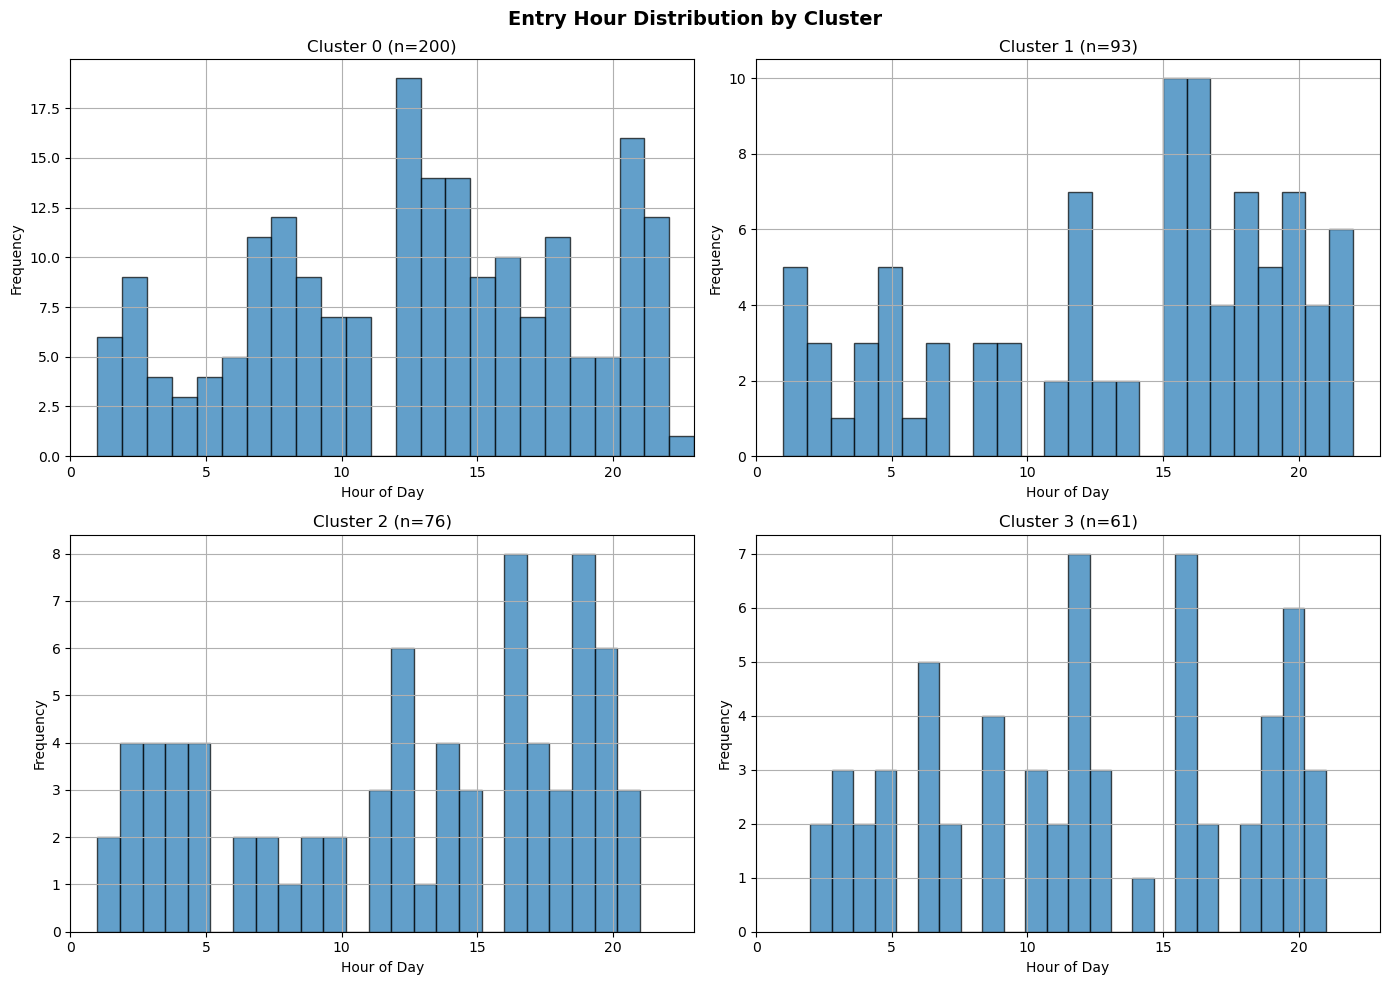

In [24]:
# Visualize Time Patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Entry Hour Distribution by Cluster', fontsize=14, fontweight='bold')

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    df['entry_hour'].hist(bins=24, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'{name} (n={len(df)})')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 23)

plt.tight_layout()
plt.savefig('entry_hour_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

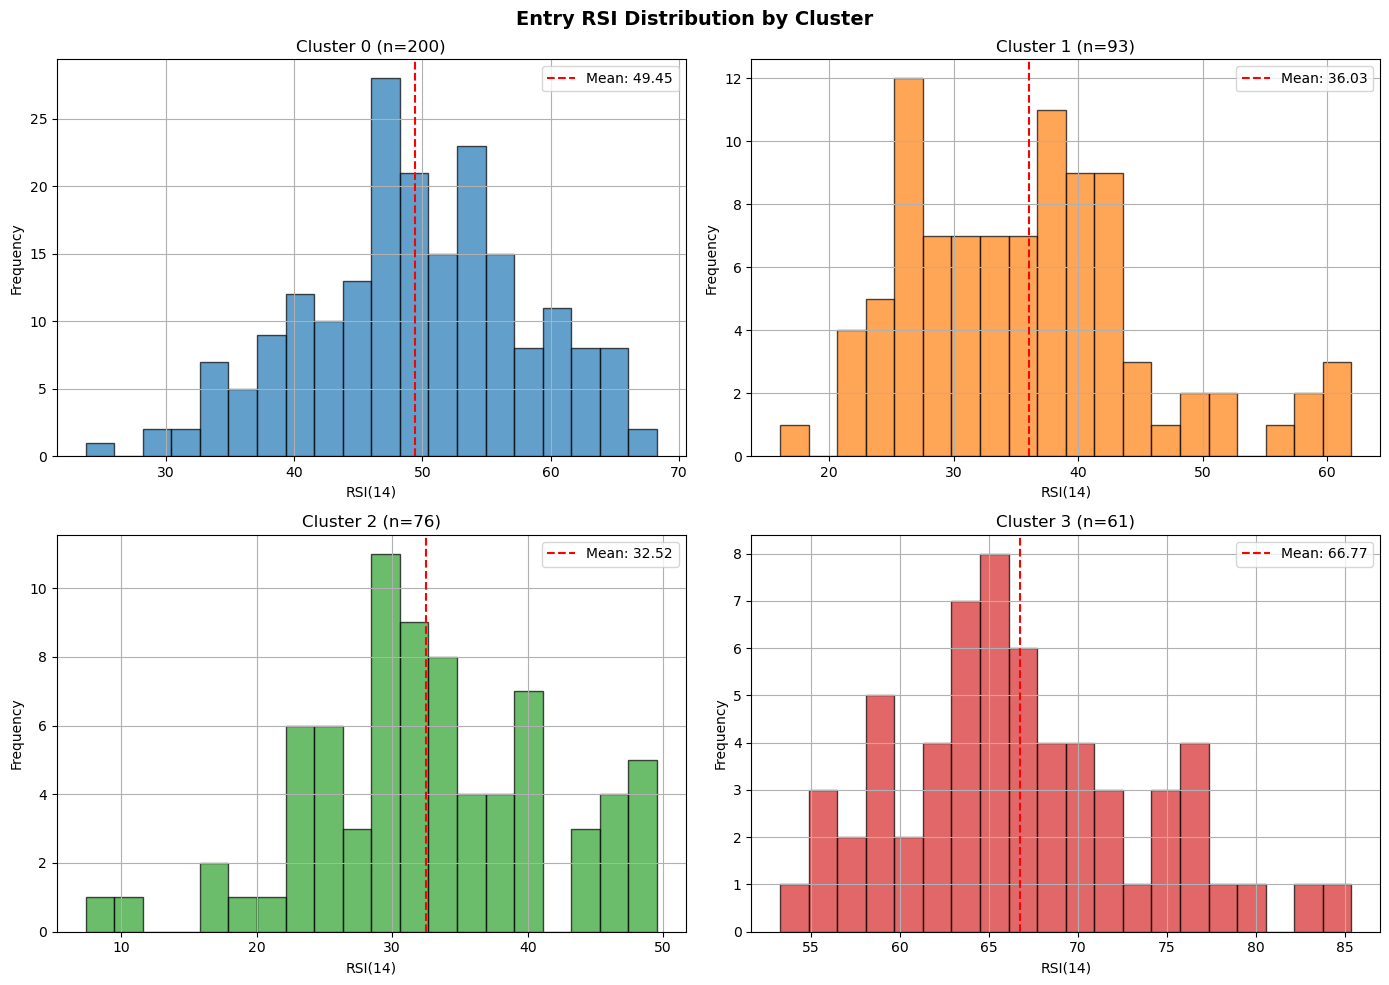

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Entry RSI Distribution by Cluster', fontsize=14, fontweight='bold')

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    df['entry_RSI(14)'].hist(bins=20, ax=ax, edgecolor='black', alpha=0.7, color=f'C{idx}')
    ax.axvline(df['entry_RSI(14)'].mean(), color='red', linestyle='--', label=f'Mean: {df["entry_RSI(14)"].mean():.2f}')
    ax.set_title(f'{name} (n={len(df)})')
    ax.set_xlabel('RSI(14)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.savefig('entry_rsi_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

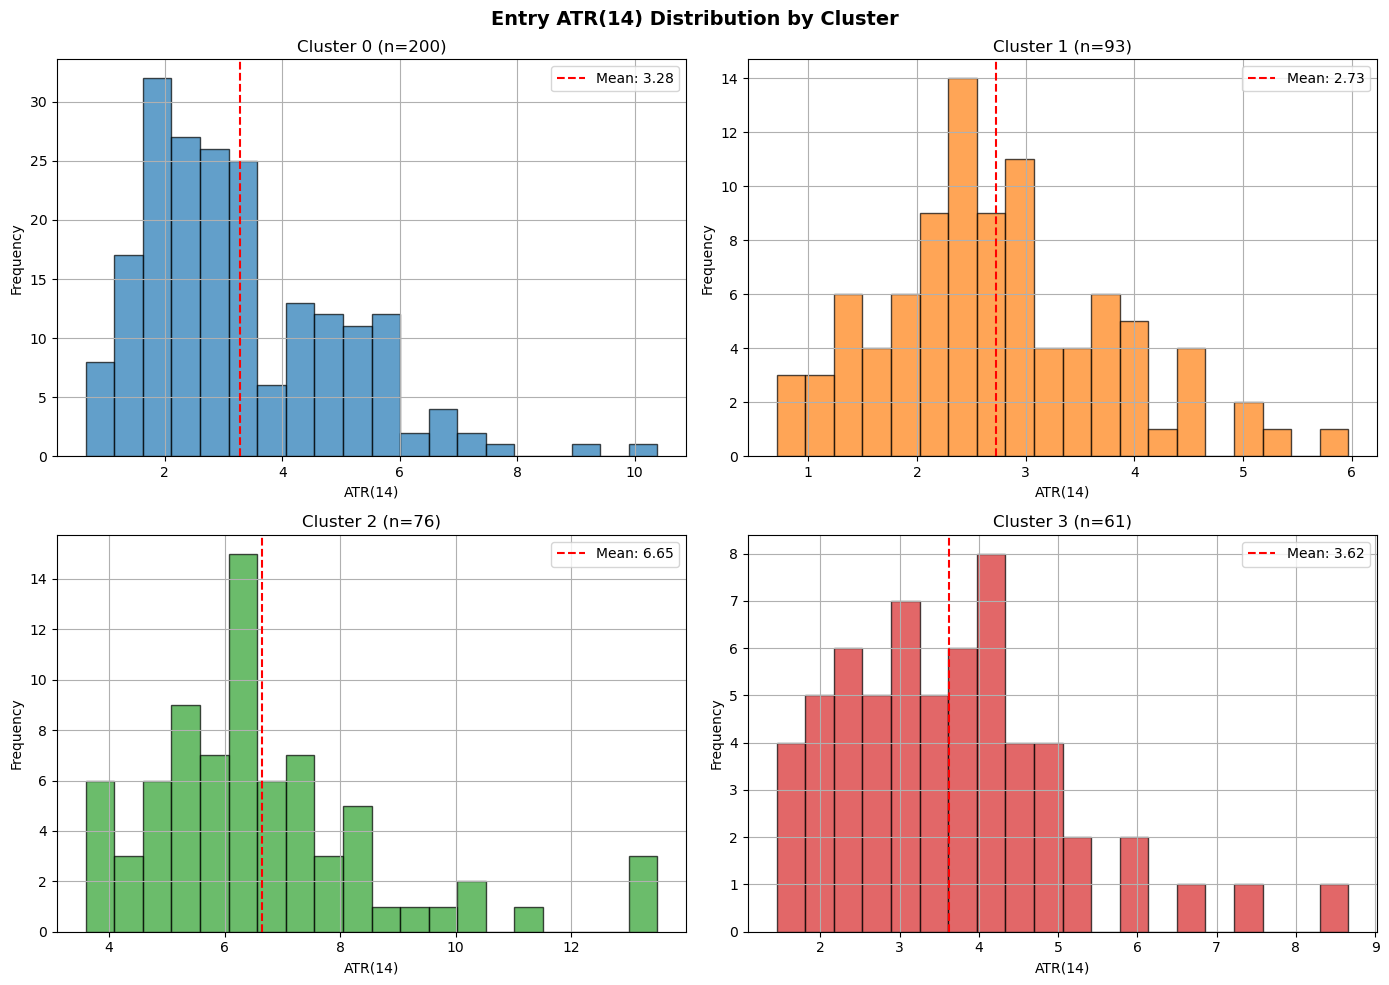


STEP 3: CORRELATION ANALYSIS (Indicators vs Profit)


In [26]:
# ATR Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Entry ATR(14) Distribution by Cluster', fontsize=14, fontweight='bold')

for idx, (name, df) in enumerate(clusters.items()):
    ax = axes[idx // 2, idx % 2]
    df['entry_ATR(14)'].hist(bins=20, ax=ax, edgecolor='black', alpha=0.7, color=f'C{idx}')
    ax.axvline(df['entry_ATR(14)'].mean(), color='red', linestyle='--', label=f'Mean: {df["entry_ATR(14)"].mean():.2f}')
    ax.set_title(f'{name} (n={len(df)})')
    ax.set_xlabel('ATR(14)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.savefig('entry_atr_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Correlation Analysis
print("\n" + "="*80)
print("STEP 3: CORRELATION ANALYSIS (Indicators vs Profit)")
print("="*80)

In [27]:
# Correlation Analysis
from scipy.stats import pearsonr  # Import directly to avoid conflicts

print("\n" + "="*80)
print("STEP 3: CORRELATION ANALYSIS (Indicators vs Profit)")
print("="*80)

# Calculate correlations between entry indicators and profit for each cluster
correlation_results = {}

for name, df in clusters.items():
    print(f"\n{name} - Correlation with Profit:")
    correlations = {}
    for ind in entry_indicators + ['duration_hours']:
        if ind in df.columns:
            # Use pearsonr directly instead of stats.pearsonr 
            corr, pvalue = pearsonr(df[ind].dropna(), df.loc[df[ind].notna(), 'profit'])
            correlations[ind] = {'Correlation': corr, 'P-Value': pvalue}
    
    corr_df = pd.DataFrame(correlations).T
    corr_df['Significant'] = corr_df['P-Value'] < 0.05
    correlation_results[name] = corr_df
    
    # Sort by absolute correlation
    corr_df_sorted = corr_df.reindex(corr_df['Correlation'].abs().sort_values(ascending=False).index)
    print(corr_df_sorted.round(4))


STEP 3: CORRELATION ANALYSIS (Indicators vs Profit)

Cluster 0 - Correlation with Profit:
                     Correlation  P-Value  Significant
entry_MACD Main           0.1551   0.0283         True
entry_RSI(14)             0.1430   0.0433         True
entry_MACD Signal         0.1429   0.0435         True
duration_hours            0.1116   0.1157        False
entry_BB_Lower            0.0726   0.3072        False
entry_MA(20,SMA)          0.0722   0.3093        False
entry_BB_Mid              0.0722   0.3093        False
entry_BB_Upper            0.0719   0.3115        False
entry_StochK(14)          0.0570   0.4229        False
entry_StochD(14)          0.0550   0.4389        False
entry_minusDI(14)        -0.0535   0.4522        False
entry_ATR(14)            -0.0416   0.5588        False
entry_plusDI(14)          0.0396   0.5773        False
entry_Spread (Pips)      -0.0191   0.7880        False
entry_ADX(14)             0.0057   0.9357        False

Cluster 1 - Correlation with

In [28]:
# Create Comprehensive Comparison DataFrame
print("\n" + "="*80)
print("COMPREHENSIVE CLUSTER COMPARISON TABLE")
print("="*80)

comparison_comprehensive = []
for name, df in clusters.items():
    row = {
        'Cluster': name,
        'N_Trades': len(df),
        'Total_Profit': df['profit'].sum(),
        'Avg_Profit': df['profit'].mean(),
        'Std_Profit': df['profit'].std(),
        'Win_Rate_%': (df['profit'] > 0).mean() * 100,
        'Avg_Duration_Hrs': df['duration_hours'].mean(),
        'Avg_RSI': df['entry_RSI(14)'].mean(),
        'Avg_ATR': df['entry_ATR(14)'].mean(),
        'Avg_ADX': df['entry_ADX(14)'].mean(),
        'Avg_MACD': df['entry_MACD Main'].mean(),
        'Avg_StochK': df['entry_StochK(14)'].mean(),
        'Trend_Bias': 'Bullish' if df['entry_plusDI(14)'].mean() > df['entry_minusDI(14)'].mean() else 'Bearish',
        'Top_Entry_Hour': df['entry_hour'].mode()[0] if len(df['entry_hour'].mode()) > 0 else 'N/A'
    }
    comparison_comprehensive.append(row)

comparison_comprehensive_df = pd.DataFrame(comparison_comprehensive)
print(comparison_comprehensive_df.to_string(index=False))

# Save to my CSV
comparison_comprehensive_df.to_csv('cluster_comparison_summary.csv', index=False)
print("\n Summary saved to 'cluster_comparison_summary.csv'")


COMPREHENSIVE CLUSTER COMPARISON TABLE
  Cluster  N_Trades  Total_Profit  Avg_Profit  Std_Profit  Win_Rate_%  Avg_Duration_Hrs  Avg_RSI  Avg_ATR  Avg_ADX  Avg_MACD  Avg_StochK Trend_Bias  Top_Entry_Hour
Cluster 0       200     2318.3900     11.5920     30.0326     70.5000           18.3471  49.4544   3.2845  24.8717   -0.1429     48.0902    Bearish              12
Cluster 1        93     1630.8800     17.5363     29.6209     76.3441           79.6298  36.0259   2.7265  42.6176   -2.3544     25.7698    Bearish              15
Cluster 2        76      298.4300      3.9267     31.0339     57.8947           15.7846  32.5176   6.6451  41.5988   -6.7966     26.3470    Bearish              16
Cluster 3        61      201.7200      3.3069     28.6810     60.6557           16.3702  66.7731   3.6168  44.2287    4.1757     79.8901    Bullish              12

 Summary saved to 'cluster_comparison_summary.csv'


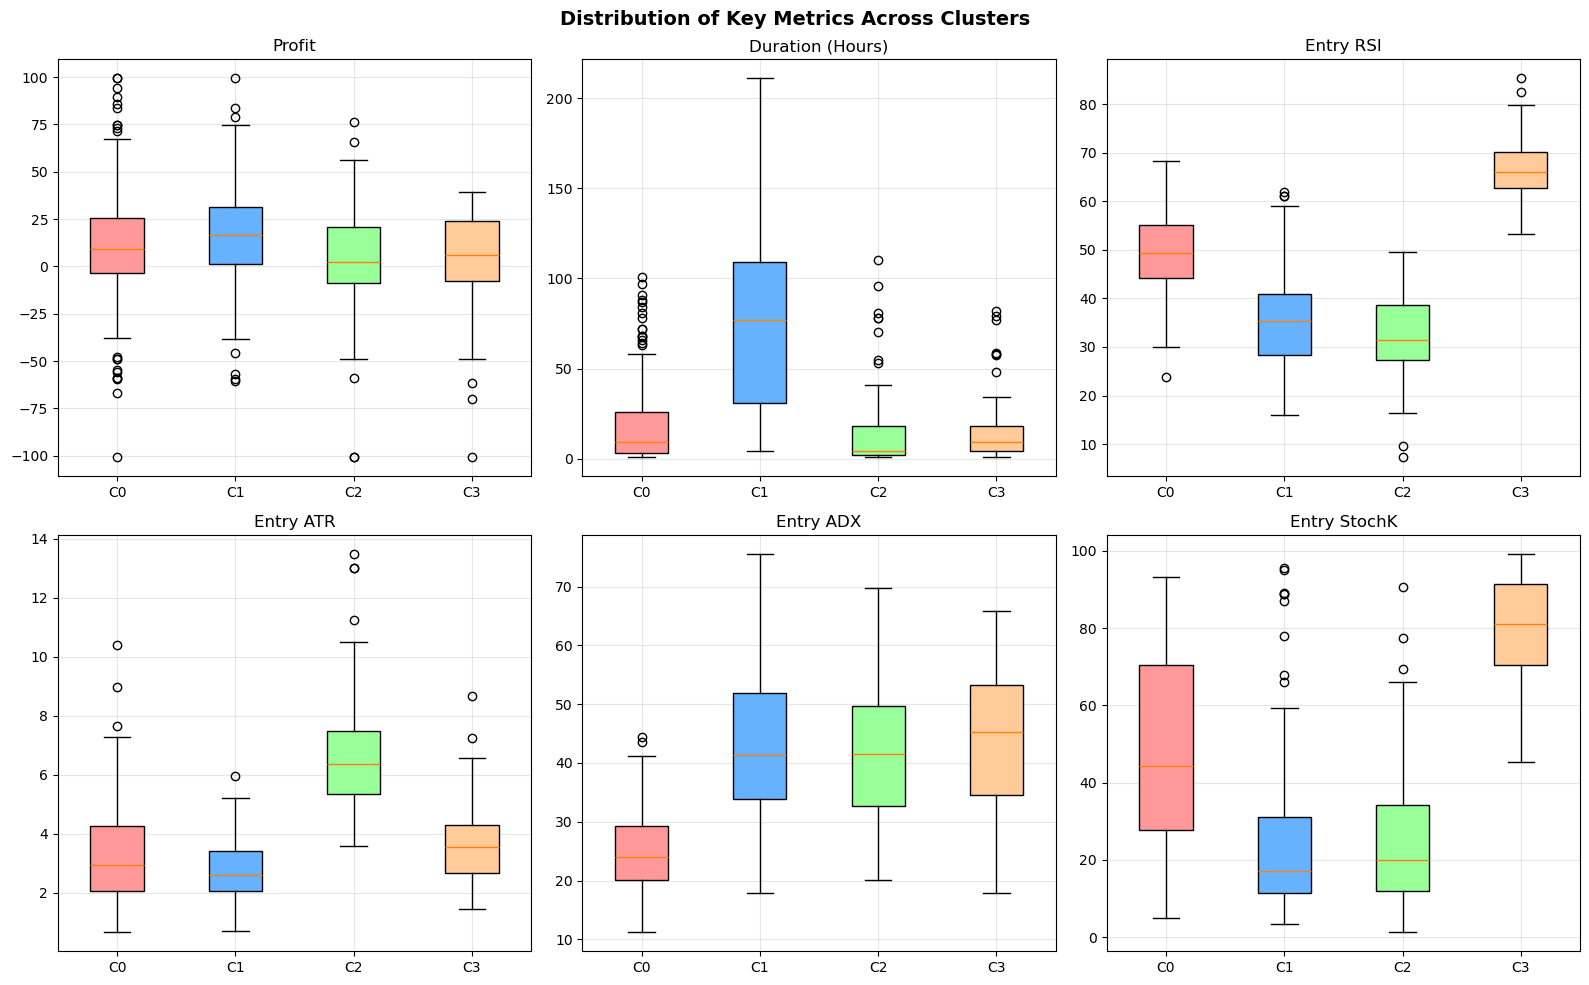

In [29]:
# %% Cell 17: Box Plots for Key Metrics
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution of Key Metrics Across Clusters', fontsize=14, fontweight='bold')

metrics = ['profit', 'duration_hours', 'entry_RSI(14)', 'entry_ATR(14)', 'entry_ADX(14)', 'entry_StochK(14)']
titles = ['Profit', 'Duration (Hours)', 'Entry RSI', 'Entry ATR', 'Entry ADX', 'Entry StochK']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 3, idx % 3]
    data = [clusters[name][metric].dropna() for name in clusters.keys()]
    bp = ax.boxplot(data, labels=['C0', 'C1', 'C2', 'C3'], patch_artist=True)
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('boxplots_key_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

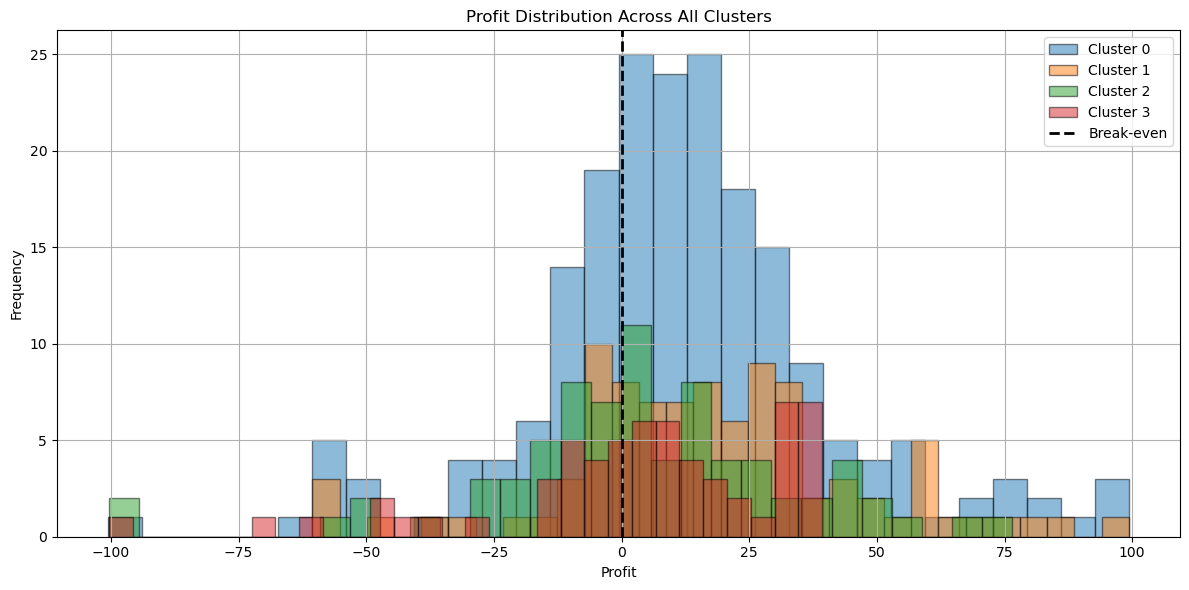

In [30]:
# Profit Distribution by Cluster
fig, ax = plt.subplots(figsize=(12, 6))

for idx, (name, df) in enumerate(clusters.items()):
    df['profit'].hist(bins=30, ax=ax, alpha=0.5, label=name, edgecolor='black')

ax.axvline(0, color='black', linestyle='--', linewidth=2, label='Break-even')
ax.set_xlabel('Profit')
ax.set_ylabel('Frequency')
ax.set_title('Profit Distribution Across All Clusters')
ax.legend()
plt.tight_layout()
plt.savefig('profit_distribution_overlay.png', dpi=150, bbox_inches='tight')
plt.show()

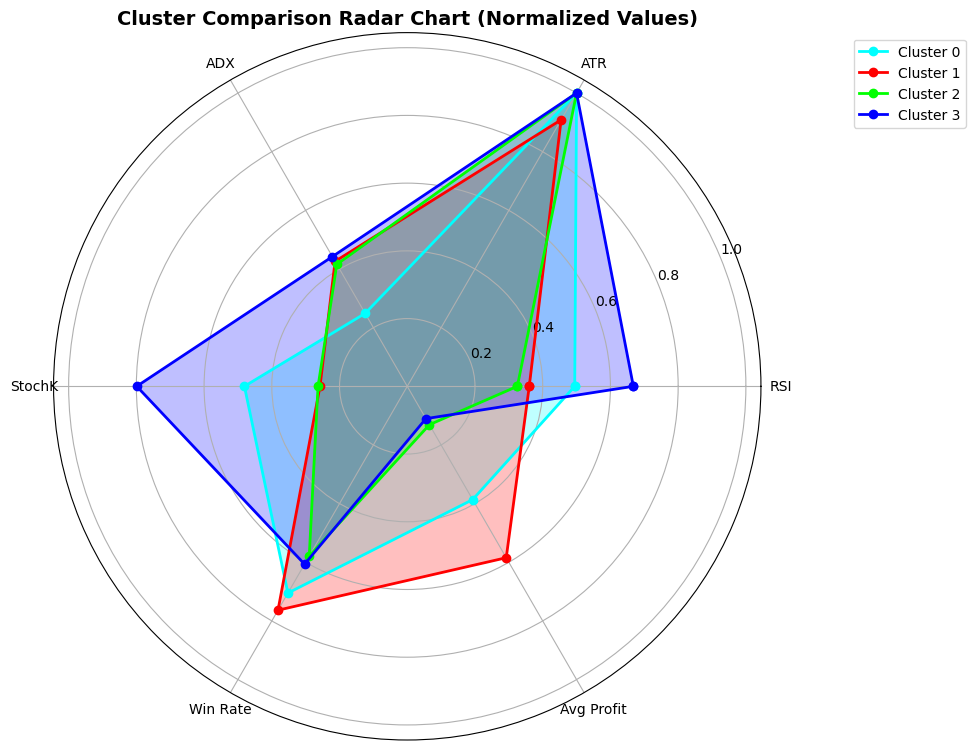

In [31]:
# %% Cell 19: Radar Chart Comparison
from math import pi

def make_radar_chart(clusters_dict):
    """Create radar chart comparing clusters"""
    categories = ['RSI', 'ATR', 'ADX', 'StochK', 'Win Rate', 'Avg Profit']
    N = len(categories)
    
    # Normalize data for comparison
    radar_data = {}
    for name, df in clusters_dict.items():
        radar_data[name] = [
            df['entry_RSI(14)'].mean() / 100,  # Normalize RSI (0-100)
            min(df['entry_ATR(14)'].mean() / 3, 1),  # Normalize ATR
            df['entry_ADX(14)'].mean() / 100,  # Normalize ADX
            df['entry_StochK(14)'].mean() / 100,  # Normalize StochK
            (df['profit'] > 0).mean(),  # Win rate already 0-1
            min(max(df['profit'].mean() / 30, 0), 1)  # Normalize profit
        ]
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    colors = ['#00ffff', '#ff0000', '#00ff00', '#0000ff']
    
    for idx, (name, values) in enumerate(radar_data.items()):
        values += values[:1]
        ax.plot(angles, values, 'o-', linewidth=2, label=name, color=colors[idx])
        ax.fill(angles, values, alpha=0.25, color=colors[idx])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title('Cluster Comparison Radar Chart (Normalized Values)', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.tight_layout()
    plt.savefig('radar_chart_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

make_radar_chart(clusters)

In [32]:
# Final Summary Report
print("\n" + "="*80)
print("                           FINAL ANALYSIS REPORT")
print("="*80)

# Find best and worst clusters
best_profit_cluster = comparison_comprehensive_df.loc[comparison_comprehensive_df['Total_Profit'].idxmax()]
best_winrate_cluster = comparison_comprehensive_df.loc[comparison_comprehensive_df['Win_Rate_%'].idxmax()]
most_trades_cluster = comparison_comprehensive_df.loc[comparison_comprehensive_df['N_Trades'].idxmax()]

print("\n KEY FINDINGS:")
print(f"\n   Best Total Profit: {best_profit_cluster['Cluster']} (${best_profit_cluster['Total_Profit']:.2f})")
print(f"   Highest Win Rate: {best_winrate_cluster['Cluster']} ({best_winrate_cluster['Win_Rate_%']:.1f}%)")
print(f"   Most Trades: {most_trades_cluster['Cluster']} ({most_trades_cluster['N_Trades']} trades)")

print("\n CLUSTER CHARACTERISTICS:")
for _, row in comparison_comprehensive_df.iterrows():
    print(f"\n   {row['Cluster']}:")
    print(f"      - {row['N_Trades']} trades, ${row['Total_Profit']:.2f} total, {row['Win_Rate_%']:.1f}% win rate")
    print(f"      - Typical entry: RSI={row['Avg_RSI']:.1f}, ATR={row['Avg_ATR']:.2f}, ADX={row['Avg_ADX']:.1f}")
    print(f"      - Trend bias: {row['Trend_Bias']}, Avg duration: {row['Avg_Duration_Hrs']:.1f} hrs")

print("\n" + "="*80)
print("Analysis complete! Check the saved PNG files for visualizations.")
print("="*80)


                           FINAL ANALYSIS REPORT

 KEY FINDINGS:

   Best Total Profit: Cluster 0 ($2318.39)
   Highest Win Rate: Cluster 1 (76.3%)
   Most Trades: Cluster 0 (200 trades)

 CLUSTER CHARACTERISTICS:

   Cluster 0:
      - 200 trades, $2318.39 total, 70.5% win rate
      - Typical entry: RSI=49.5, ATR=3.28, ADX=24.9
      - Trend bias: Bearish, Avg duration: 18.3 hrs

   Cluster 1:
      - 93 trades, $1630.88 total, 76.3% win rate
      - Typical entry: RSI=36.0, ATR=2.73, ADX=42.6
      - Trend bias: Bearish, Avg duration: 79.6 hrs

   Cluster 2:
      - 76 trades, $298.43 total, 57.9% win rate
      - Typical entry: RSI=32.5, ATR=6.65, ADX=41.6
      - Trend bias: Bearish, Avg duration: 15.8 hrs

   Cluster 3:
      - 61 trades, $201.72 total, 60.7% win rate
      - Typical entry: RSI=66.8, ATR=3.62, ADX=44.2
      - Trend bias: Bullish, Avg duration: 16.4 hrs

Analysis complete! Check the saved PNG files for visualizations.


In [ ]:
# Pushed to git Im done for this day 
